In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import tensorflow as tf

print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.0.0
즉시 실행: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: /root/.keras/datasets/iris_training.csv


In [5]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [6]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [8]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([5.8, 5.8, 5.1, 5.6, 4.5, 7.9, 4.7, 5.4, 6.5, 5. , 4.8, 6.7, 5.3,
       5. , 4.9, 5.8, 5. , 5.1, 5.8, 5.2, 6.8, 6.3, 5.4, 6.8, 4.8, 6.1,
       5.5, 6. , 5. , 6.3, 4.4, 6.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([2.8, 2.7, 3.7, 2.9, 2.3, 3.8, 3.2, 3. , 3.2, 3.5, 3.4, 3. , 3.7,
       3.3, 2.5, 2.6, 3.5, 3.8, 4. , 2.7, 2.8, 2.7, 3.4, 3. , 3. , 2.6,
       3.5, 3. , 3.4, 3.4, 2.9, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([5.1, 5.1, 1.5, 3.6, 1.3, 6.4, 1.3, 4.5, 5.1, 1.6, 1.6, 5.2, 1.5,
       1.4, 4.5, 4. , 1.3, 1.6, 1.2, 3.9, 4.8, 4.9, 1.5, 5.5, 1.4, 5.6,
       1.3, 4.8, 1.5, 5.6, 1.4, 4.4], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([2.4, 1.9, 0.4, 1.3, 0.3, 2. , 0.2, 1.5, 2. , 0.6, 0.2, 2.3, 0.2,
       0.2, 1.7, 1.2, 0.3, 0.2, 0

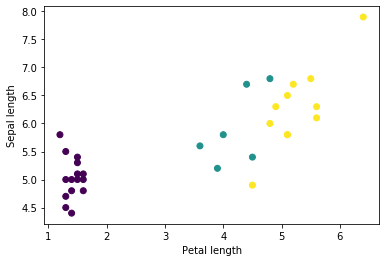

In [9]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [10]:
def pack_features_vector(features, labels):
  """특성들을 단일 배열로 묶습니다."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [6.3 2.5 5.  1.9]
 [6.5 3.2 5.1 2. ]
 [4.6 3.2 1.4 0.2]], shape=(5, 4), dtype=float32)


In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 입력의 형태가 필요합니다.
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [13]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=231, shape=(5, 3), dtype=float32, numpy=
array([[0.89349633, 0.32373232, 0.81705725],
       [1.0234979 , 0.39593065, 0.9575577 ],
       [0.82833916, 0.29463094, 0.7925841 ],
       [0.9443952 , 0.36042345, 0.83572865],
       [0.8454612 , 0.34996524, 0.7241342 ]], dtype=float32)>

In [14]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=236, shape=(5, 3), dtype=float32, numpy=
array([[0.4012731 , 0.22698371, 0.37174317],
       [0.40484586, 0.21614276, 0.37901136],
       [0.3919566 , 0.22985366, 0.37818977],
       [0.40738034, 0.22718745, 0.3654322 ],
       [0.4007995 , 0.24419458, 0.35500586]], dtype=float32)>

In [15]:
print("  예측: {}".format(tf.argmax(predictions, axis=1)))
print("레이블: {}".format(labels))

  예측: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
레이블: [2 1 2 2 0 1 1 2 2 2 2 1 0 1 2 1 0 0 1 0 0 0 0 0 2 1 2 1 2 2 1 1]


In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("손실 테스트: {}".format(l))

손실 테스트: 1.1253514289855957


In [18]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [20]:
loss_value, grads = grad(model, features, labels)

print("단계: {}, 초기 손실: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("단계: {},      손실: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

단계: 0, 초기 손실: 1.1253514289855957
단계: 1,      손실: 1.0933935642242432


In [ ]:
## 노트: 이 셀을 다시 실행하면 동일한 모델의 변수가 사용됩니다.

# 도식화를 위해 결과를 저장합니다.
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # 훈련 루프 - 32개의 배치를 사용합니다.
  for x, y in train_dataset:
    # 모델을 최적화합니다.
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 진행 상황을 추적합니다.
    epoch_loss_avg(loss_value)  # 현재 배치 손실을 추가합니다.
    # 예측된 레이블과 실제 레이블 비교합니다.
    epoch_accuracy(y, model(x))

  # epoch 종료
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("에포크 {:03d}: 손실: {:.3f}, 정확도: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

에포크 000: 손실: 1.061, 정확도: 58.333%
에포크 050: 손실: 0.068, 정확도: 97.500%
에포크 100: 손실: 0.065, 정확도: 99.167%
에포크 150: 손실: 0.051, 정확도: 98.333%


In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('훈련 지표')

axes[0].set_ylabel("손실", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("정확도", fontsize=14)
axes[1].set_xlabel("에포크", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [ ]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [ ]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("테스트 세트 정확도: {:.3%}".format(test_accuracy.result()))

In [ ]:
tf.stack([y,prediction],axis=1)

In [ ]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("샘플 {} 예측: {} ({:4.1f}%)".format(i, name, 100*p))